In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
sales = pd.read_csv('sales_train_evaluation.csv')
calendar = pd.read_csv('calendar.csv')
price = pd.read_csv('sell_prices.csv')

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


In [4]:
sales = reduce_mem_usage(sales)
calendar = reduce_mem_usage(calendar)
price = reduce_mem_usage(price)

Memory usage of dataframe is 452.91 MB
Memory usage after optimization is: 96.30 MB
Decreased by 78.7%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.19 MB
Decreased by 8.7%
Memory usage of dataframe is 208.77 MB
Memory usage after optimization is: 45.76 MB
Decreased by 78.1%


In [5]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, price, on=['store_id','item_id','wm_yr_wk'], how='left')
display(df.head())
print(df.info())

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype   
---  ------        -----   
 0   id            category
 1   item_id       category
 2   dept_id       category
 3   cat_id        category
 4   store_id      category
 5   state_id      category
 6   d             object  
 7   sold          int16   
 8   date          category
 9   wm_yr_wk      int16   
 10  weekday       category
 11  wday          int8    
 12  month         int8    
 13  year          int16   
 14  event_name_1  category
 15  event_type_1  category
 16  event_name_2  category
 17  event_type_2  category
 18  snap_CA       int8    
 19  snap_TX       int8    
 20  snap_WI       int8    
 21  sell_price    float16 
dtypes: category(12), float16(1), int16(3), int8(5), object(1)
memory usage: 2.0+ GB
None


In [6]:
df.drop(["wm_yr_wk"],axis=1,inplace=True)

In [7]:
df.drop(["weekday"],axis=1,inplace=True)

In [8]:
df.d = df['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 20 columns):
 #   Column        Dtype   
---  ------        -----   
 0   id            category
 1   item_id       category
 2   dept_id       category
 3   cat_id        category
 4   store_id      category
 5   state_id      category
 6   d             int16   
 7   sold          int16   
 8   date          category
 9   wday          int8    
 10  month         int8    
 11  year          int16   
 12  event_name_1  category
 13  event_type_1  category
 14  event_name_2  category
 15  event_type_2  category
 16  snap_CA       int8    
 17  snap_TX       int8    
 18  snap_WI       int8    
 19  sell_price    float16 
dtypes: category(11), float16(1), int16(3), int8(5)
memory usage: 1.5 GB
None


In [9]:
cols = df.dtypes.index.tolist()
types = df.dtypes.values.tolist()
for i,type in enumerate(types):
    if type.name == 'category':
        df[cols[i]] = df[cols[i]].cat.codes

lags = [7,14,28,56]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag+28).astype(np.float16)


sold_lag_cols = ['sold_lag_7','sold_lag_28']
for win in [7,28] :
    for lag,lag_col in zip([7,28], sold_lag_cols):
        df['rmean_{}_{}'.format(lag,win)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold_lag_'+str(lag)].transform(lambda x: x.rolling(window=win).mean()).astype(np.float16)


In [ ]:
df['item_sold_avg'] = df.groupby('item_id')['sold'].transform('mean').astype(np.float16)    
df['state_sold_avg'] = df.groupby('state_id')['sold'].transform('mean').astype(np.float16)
df['store_sold_avg'] = df.groupby('store_id')['sold'].transform('mean').astype(np.float16)
df['cat_sold_avg'] = df.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
df['dept_sold_avg'] = df.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
df['cat_dept_sold_avg'] = df.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
df['store_item_sold_avg'] = df.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['cat_item_sold_avg'] = df.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['dept_item_sold_avg'] = df.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_sold_avg'] = df.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_cat_sold_avg'] = df.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
df['store_cat_dept_sold_avg'] = df.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)


In [ ]:
df['price_lag'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sell_price'].shift(7).astype(np.float16)
df['price-diff']=df['price_lag']-df['sell_price']
df.drop(['price_lag'], axis=1, inplace=True)

df['expanding_price_mean'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sell_price'].transform(lambda x: x.expanding(2).mean()).astype(np.float16)
df['diff_moving_mean']=df['expanding_price_mean']-df['sell_price']
df.drop(['expanding_price_mean'], axis=1, inplace=True)

df['price-diff']=df['price-diff'].astype(np.float16)

In [12]:

#df['wm_yr_wk_linear']=LabelEncoder().fit_transform(df['wm_yr_wk'].values).astype(np.int16)
#df.drop(['wm_yr_wk'], axis=1, inplace=True)


#df.drop(['wday'], axis=1, inplace=True)
#df['decimal']=df['decimal'].astype(np.int8)
#df['year']=LabelEncoder().fit_transform(df['year']).astype(np.int8)

df['daily_avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id','d'])['sell_price'].transform('mean').astype(np.float16)
df['avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sell_price'].transform('mean').astype(np.float16)
df['selling_trend'] = (df['daily_avg_sold'] - df['avg_sold']).astype(np.float16)
df.drop(['daily_avg_sold','avg_sold'],axis=1,inplace=True)


df['price_max'] = df.groupby(['store_id','item_id'])['sell_price'].transform('max')
df['price_min'] = df.groupby(['store_id','item_id'])['sell_price'].transform('min')
df['price_std'] = df.groupby(['store_id','item_id'])['sell_price'].transform('std')
df['price_mean'] = df.groupby(['store_id','item_id'])['sell_price'].transform('mean')
df['price_norm'] = df['sell_price']/df['price_max']
df['price_momentum'] = df['sell_price']/df.groupby(['store_id','item_id'])['sell_price'].transform(lambda x: x.shift(1))
df['price_momentum_m'] = df['sell_price']/df.groupby(['store_id','item_id','month'])['sell_price'].transform('mean')
df['price_momentum_y'] = df['sell_price']/df.groupby(['store_id','item_id','year'])['sell_price'].transform('mean')

In [13]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 50 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int16  
 1   item_id                   int16  
 2   dept_id                   int8   
 3   cat_id                    int8   
 4   store_id                  int8   
 5   state_id                  int8   
 6   d                         int16  
 7   sold                      int16  
 8   date                      int16  
 9   month                     int8   
 10  year                      int16  
 11  event_name_1              int8   
 12  event_type_1              int8   
 13  event_name_2              int8   
 14  event_type_2              int8   
 15  snap_CA                   int8   
 16  snap_TX                   int8   
 17  snap_WI                   int8   
 18  sell_price                float16
 19  sold_lag_7                float16
 20  sold_lag_14           

In [14]:
cat_feats = ['item_id', 'dept_id','store_id', 'cat_id']
for cc in cat_feats:
    le = LabelEncoder()
    df[cc] = le.fit_transform(df[cc])

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 50 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int16  
 1   item_id                   int64  
 2   dept_id                   int64  
 3   cat_id                    int64  
 4   store_id                  int64  
 5   state_id                  int8   
 6   d                         int16  
 7   sold                      int16  
 8   date                      int16  
 9   month                     int8   
 10  year                      int16  
 11  event_name_1              int8   
 12  event_type_1              int8   
 13  event_name_2              int8   
 14  event_type_2              int8   
 15  snap_CA                   int8   
 16  snap_TX                   int8   
 17  snap_WI                   int8   
 18  sell_price                float16
 19  sold_lag_7                float16
 20  sold_lag_14           

In [53]:
#X_train, y_train = df[df['d']<1914].drop('sold',axis=1), df[df['d']<1914]['sold']
#X_valid, y_valid = df[(df['d']>=1914) & (df['d']<1942)].drop('sold',axis=1), df[(df['d']>=1914) & (df['d']<1942)]['sold']

In [54]:
#X_train.drop(['id', 'snap_CA', 'year', 'date'], axis = 1, inplace = True)
#X_valid.drop(['id', 'snap_CA', 'year', 'date'], axis = 1, inplace = True)

In [16]:
store_counts = df['store_id'].value_counts()
print(store_counts)
state_counts = df['state_id'].value_counts()
print(state_counts)


store_id
0    5918109
1    5918109
2    5918109
3    5918109
4    5918109
5    5918109
6    5918109
7    5918109
8    5918109
9    5918109
Name: count, dtype: int64
state_id
0    23672436
1    17754327
2    17754327
Name: count, dtype: int64


In [23]:
d_state_id = [0,1,2]
d_store_id = [0,1,2,3,4,5,6,7,8,9]

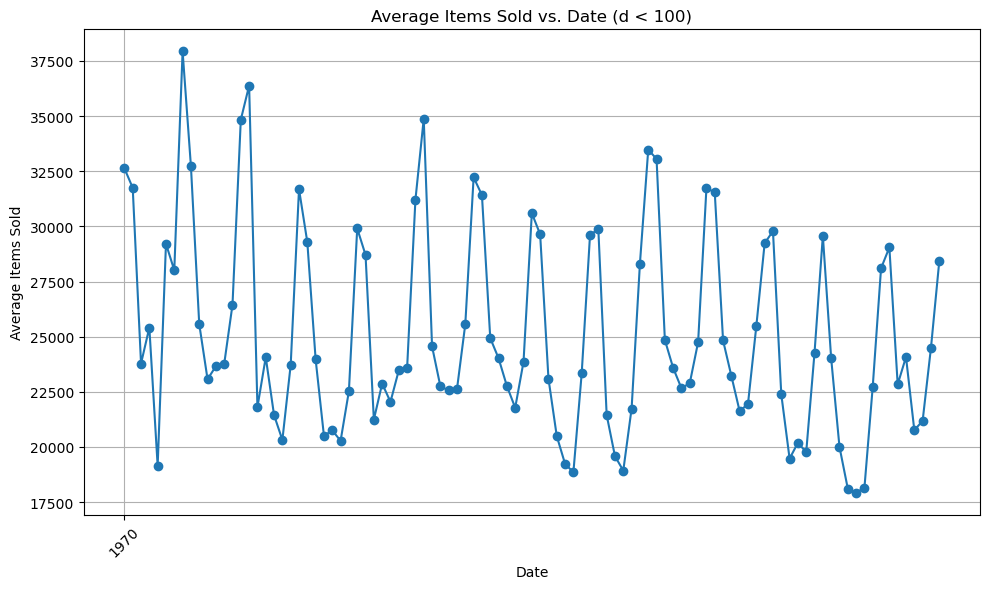

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'date' is a datetime column and 'sold' is the column representing the number of items sold
# Filter the DataFrame to include only dates where d is less than 100
filtered_df = df[df['d'] < 100]

# Group by date and calculate the average number of items sold for each date
average_items_sold = filtered_df.groupby('date')['sold'].sum()

# Convert the index (date) to datetime, if not already
average_items_sold.index = pd.to_datetime(average_items_sold.index)

# Plot the average number of items sold against the dates
plt.figure(figsize=(10, 6))
plt.plot(average_items_sold.index, average_items_sold.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Items Sold')
plt.title('Average Items Sold vs. Date (d < 100)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df = df[df['d']>=57]
df.to_pickle('data.pkl')
#del df, sales, prices, calendar


NameError: name 'df' is not defined

In [21]:
import gc
gc.collect()

4702

In [56]:

#valid_preds_csv = pd.Series(index=df.index)
#eval_preds = pd.Series(index=df.index)

#for store in d_store_id:
#    store_df = data[data['store_id'] == store]
#    X_train = store_df[store_df['d'] < 1914].drop('sold', axis=1)
#    y_train = store_df[store_df['d'] < 1914]['sold']
 #   X_valid_csv = store_df[(store_df['d'] >= 1914) & (store_df['d'] < 1942)].drop('sold', axis=1)
 #   y_valid_csv = store_df[(store_df['d'] >= 1914) & (store_df['d'] < 1942)]['sold']
 #   
  #  print('shape:', store, store_df.shape)
  #  print('X_train shape:', X_train.shape)
  #  print('y_train shape:', y_train.shape)
  #  print('X_valid_csv shape:', X_valid_csv.shape)
  #  print('y_valid_csv shape:', y_valid_csv.shape)

shape: 0 (5918109, 29)
X_train shape: (5832737, 28)
y_train shape: (5832737,)
X_valid_csv shape: (85372, 28)
y_valid_csv shape: (85372,)
shape: 1 (5918109, 29)
X_train shape: (5832737, 28)
y_train shape: (5832737,)
X_valid_csv shape: (85372, 28)
y_valid_csv shape: (85372,)
shape: 2 (5918109, 29)
X_train shape: (5832737, 28)
y_train shape: (5832737,)
X_valid_csv shape: (85372, 28)
y_valid_csv shape: (85372,)
shape: 3 (5918109, 29)
X_train shape: (5832737, 28)
y_train shape: (5832737,)
X_valid_csv shape: (85372, 28)
y_valid_csv shape: (85372,)


In [29]:
from lightgbm import LGBMRegressor
import optuna
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.datasets import make_regression
import joblib
from lightgbm import LGBMRegressor, early_stopping

data = pd.read_pickle('data.pkl')
valid_preds_csv = pd.Series(index=data.index)
eval_preds = pd.Series(index=data.index)


for state in d_state_id:
    state_df = data[data['state_id'] == state]
    
    X_train = state_df[state_df['d'] < 1914].drop('sold', axis=1)
    y_train = state_df[state_df['d'] < 1914]['sold']
    X_valid_csv = state_df[(state_df['d'] >= 1914) & (state_df['d'] < 1942)].drop('sold', axis=1)
    y_valid_csv = state_df[(state_df['d'] >= 1914) & (state_df['d'] < 1942)]['sold']
    
    model = LGBMRegressor(
        learning_rate=0.05,
        subsample=0.6,
        feature_fraction=0.6,
        num_iterations=1200,
        max_bin=350,
        num_leaves=100,
        lambda_l2=0.003,
        max_depth=200,
        min_data_in_leaf=80,
        force_row_wise=True
    )
    print('*****Prediction for Store: {}*****'.format(state))
    early_stopping_callback = early_stopping(stopping_rounds=50, verbose=100)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid_csv, y_valid_csv)],
              eval_metric='rmse', callbacks=[early_stopping_callback])
    valid_preds_csv[X_valid_csv.index] = model.predict(X_valid_csv)


*****Prediction for Store: 0*****


C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 8380
[LightGBM] [Info] Number of data points in the train set: 22647972, number of used features: 48
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is

C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 8511
[LightGBM] [Info] Number of data points in the train set: 16985979, number of used features: 49
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is

C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 8398
[LightGBM] [Info] Number of data points in the train set: 16985979, number of used features: 49
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is

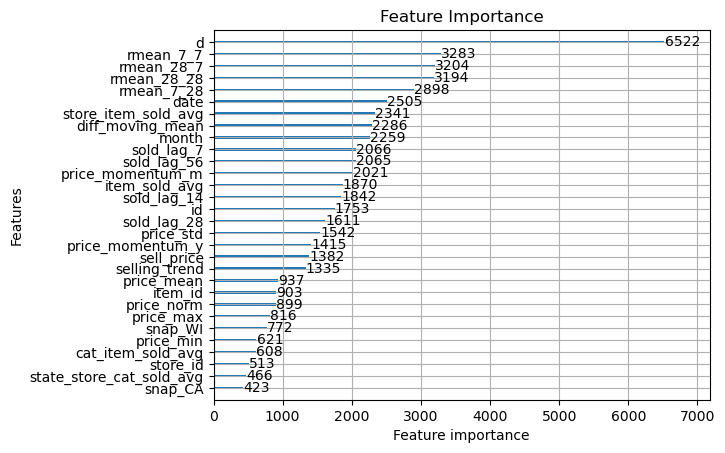

In [34]:

lgb.plot_importance(model, max_num_features=30, importance_type='split')
plt.title("Feature Importance")
plt.show()

In [36]:
data = pd.read_pickle('data.pkl')
valid_preds_csv = pd.Series(index=data.index)

for state in d_state_id:
    state_df = data[data['state_id'] == state]
    state_df.drop(['date','id'],axis=1)

In [42]:
gc.collect()

2291

In [43]:
data = pd.read_pickle('data.pkl')
for state in d_state_id:
    state_df = data[data['state_id'] == state]
    state_df.drop(['date','id'],axis=1)
    X_train = state_df[state_df['d'] < 1914].drop(['sold','d'], axis=1)
   # X_train = X_train.drop(['d'],axis=1)
    y_train = state_df[state_df['d'] < 1914]['sold']
    #y_train = y_train.drop(['d'],axis=1)
    X_valid_csv = state_df[(state_df['d'] >= 1914) & (state_df['d'] < 1942)].drop(['sold','d'], axis=1)
    y_valid_csv = state_df[(state_df['d'] >= 1914) & (state_df['d'] < 1942)]['sold']
    
    model = LGBMRegressor(
        objective = 'tweedie', 
        learning_rate=0.05,
        subsample=0.6,
        feature_fraction=0.6,
        num_iterations=1200,
        max_bin=350,
        num_leaves=100,
        lambda_l2=0.003,
        max_depth=200,
        min_data_in_leaf=80,
        force_row_wise=True
    )
    print('*****Prediction for Store: {}*****'.format(state))
    early_stopping_callback = early_stopping(stopping_rounds=50, verbose=100)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid_csv, y_valid_csv)],
              eval_metric='rmse', callbacks=[early_stopping_callback])
    valid_preds_csv[X_valid_csv.index] = model.predict(X_valid_csv)

SystemError: deallocated bytearray object has exported buffers

MemoryError: 

In [27]:
from lightgbm import LGBMRegressor
import optuna
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.datasets import make_regression
import joblib
from lightgbm import LGBMRegressor, early_stopping



seed = 123

def objectives(trial):
    params = {
        'objective': 'tweedie',
        'tweedie_variance_power': 1.5,  # Typical value for Tweedie regression, adjust as needed
        'metric': 'rmse',
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 63, 255),
        'max_depth': trial.suggest_int('max_depth', 4, 8),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
    }
    
    early_stopping_callback = early_stopping(stopping_rounds=50, first_metric_only=False, verbose=False, min_delta=0.0)
    
    model = LGBMRegressor(random_state=seed, **params)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stopping_callback])
    preds = model.predict(X_valid)
    score = np.sqrt(mean_squared_error(y_valid, preds))
    
    return score

# Optuna optimization
opt = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=seed))
opt.optimize(objectives, n_trials=50)

# Best parameters
best_params = opt.best_trial.params
best_params['objective'] = 'tweedie'
best_params['metric'] = 'rmse'
best_params['tweedie_variance_power'] = 1.5  # Adjust as needed

print('Best parameters:', best_params)

[I 2024-02-17 17:54:25,009] A new study created in memory with name: no-name-7b5b12c3-193c-42f6-9f7e-1e61141f7503


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.919356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:55:06,876] Trial 0 finished with value: 2.2384587878839777 and parameters: {'learning_rate': 0.08482345927989308, 'num_leaves': 118, 'max_depth': 5, 'min_child_samples': 60}. Best is trial 0 with value: 2.2384587878839777.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.847039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:56:03,855] Trial 1 finished with value: 2.2090104465195637 and parameters: {'learning_rate': 0.08597344848927815, 'num_leaves': 144, 'max_depth': 8, 'min_child_samples': 72}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.049352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:56:44,758] Trial 2 finished with value: 2.2402290042723965 and parameters: {'learning_rate': 0.07404659507421806, 'num_leaves': 138, 'max_depth': 5, 'min_child_samples': 76}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.926402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:57:24,705] Trial 3 finished with value: 2.2434433869708457 and parameters: {'learning_rate': 0.07192861223398123, 'num_leaves': 74, 'max_depth': 5, 'min_child_samples': 77}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.724581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:58:11,248] Trial 4 finished with value: 2.2408140735222735 and parameters: {'learning_rate': 0.059124586522675, 'num_leaves': 96, 'max_depth': 6, 'min_child_samples': 58}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.735850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:59:01,640] Trial 5 finished with value: 2.2259125839947353 and parameters: {'learning_rate': 0.08172004792756606, 'num_leaves': 226, 'max_depth': 7, 'min_child_samples': 65}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.934314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 17:59:42,114] Trial 6 finished with value: 2.2344222281333947 and parameters: {'learning_rate': 0.08612216912851109, 'num_leaves': 125, 'max_depth': 5, 'min_child_samples': 30}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.930666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:00:18,071] Trial 7 finished with value: 2.2664385347700655 and parameters: {'learning_rate': 0.06468570231944147, 'num_leaves': 184, 'max_depth': 4, 'min_child_samples': 49}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.041253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:01:03,300] Trial 8 finished with value: 2.237763182624832 and parameters: {'learning_rate': 0.0715431381664822, 'num_leaves': 158, 'max_depth': 6, 'min_child_samples': 38}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.894586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:02:01,010] Trial 9 finished with value: 2.209502487398916 and parameters: {'learning_rate': 0.07131756534814042, 'num_leaves': 235, 'max_depth': 8, 'min_child_samples': 55}. Best is trial 1 with value: 2.2090104465195637.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.855609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:02:55,420] Trial 10 finished with value: 2.2022436957328795 and parameters: {'learning_rate': 0.09921773840724633, 'num_leaves': 195, 'max_depth': 8, 'min_child_samples': 10}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.945860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:03:50,238] Trial 11 finished with value: 2.211195087853771 and parameters: {'learning_rate': 0.09940542446575644, 'num_leaves': 198, 'max_depth': 8, 'min_child_samples': 96}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.811248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:04:38,688] Trial 12 finished with value: 2.219551158762952 and parameters: {'learning_rate': 0.09931445282008423, 'num_leaves': 180, 'max_depth': 7, 'min_child_samples': 11}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.770260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:05:33,982] Trial 13 finished with value: 2.212091374896236 and parameters: {'learning_rate': 0.09349206249599931, 'num_leaves': 156, 'max_depth': 8, 'min_child_samples': 19}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.940390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:06:23,489] Trial 14 finished with value: 2.2226686694153703 and parameters: {'learning_rate': 0.09182171352719813, 'num_leaves': 205, 'max_depth': 7, 'min_child_samples': 98}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.881988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:07:19,318] Trial 15 finished with value: 2.2081571210866526 and parameters: {'learning_rate': 0.09157935752799463, 'num_leaves': 215, 'max_depth': 8, 'min_child_samples': 79}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.813379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:08:13,769] Trial 16 finished with value: 2.2387476742925383 and parameters: {'learning_rate': 0.05018388179694605, 'num_leaves': 250, 'max_depth': 7, 'min_child_samples': 84}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.898193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:09:08,543] Trial 17 finished with value: 2.2139435514423775 and parameters: {'learning_rate': 0.09299169340473101, 'num_leaves': 220, 'max_depth': 8, 'min_child_samples': 42}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.943891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:09:59,142] Trial 18 finished with value: 2.2268881389293584 and parameters: {'learning_rate': 0.07991458513915828, 'num_leaves': 178, 'max_depth': 7, 'min_child_samples': 26}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.924314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:10:43,112] Trial 19 finished with value: 2.228450014320411 and parameters: {'learning_rate': 0.09515357870928581, 'num_leaves': 254, 'max_depth': 6, 'min_child_samples': 87}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.963291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:11:39,187] Trial 20 finished with value: 2.213005675410082 and parameters: {'learning_rate': 0.08879065809745967, 'num_leaves': 207, 'max_depth': 8, 'min_child_samples': 10}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.757267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:12:35,179] Trial 21 finished with value: 2.2065585618933947 and parameters: {'learning_rate': 0.08819608525054998, 'num_leaves': 141, 'max_depth': 8, 'min_child_samples': 69}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.845796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:13:29,556] Trial 22 finished with value: 2.2053920882560827 and parameters: {'learning_rate': 0.09708017913346402, 'num_leaves': 187, 'max_depth': 8, 'min_child_samples': 67}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.839401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:14:18,938] Trial 23 finished with value: 2.220161143907561 and parameters: {'learning_rate': 0.09699542529747383, 'num_leaves': 190, 'max_depth': 7, 'min_child_samples': 68}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.815720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:15:15,380] Trial 24 finished with value: 2.21456017461401 and parameters: {'learning_rate': 0.07982711826577961, 'num_leaves': 170, 'max_depth': 8, 'min_child_samples': 48}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.156156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:16:05,105] Trial 25 finished with value: 2.225089788548022 and parameters: {'learning_rate': 0.08938920119297805, 'num_leaves': 108, 'max_depth': 7, 'min_child_samples': 65}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.835270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:16:59,800] Trial 26 finished with value: 2.2088955878839434 and parameters: {'learning_rate': 0.09987841293290255, 'num_leaves': 163, 'max_depth': 8, 'min_child_samples': 49}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.757770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:17:43,363] Trial 27 finished with value: 2.2309085568074867 and parameters: {'learning_rate': 0.0965400575115652, 'num_leaves': 142, 'max_depth': 6, 'min_child_samples': 36}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.801859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:18:38,364] Trial 28 finished with value: 2.204825316401305 and parameters: {'learning_rate': 0.089071451631587, 'num_leaves': 191, 'max_depth': 8, 'min_child_samples': 63}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.845829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:19:13,160] Trial 29 finished with value: 2.248245337187677 and parameters: {'learning_rate': 0.08380127275306391, 'num_leaves': 196, 'max_depth': 4, 'min_child_samples': 89}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.878347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:20:03,935] Trial 30 finished with value: 2.2228141725533734 and parameters: {'learning_rate': 0.07742435840937792, 'num_leaves': 211, 'max_depth': 7, 'min_child_samples': 62}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.920226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:20:59,582] Trial 31 finished with value: 2.2159531556981644 and parameters: {'learning_rate': 0.08787734153551767, 'num_leaves': 174, 'max_depth': 8, 'min_child_samples': 69}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.854544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:21:53,069] Trial 32 finished with value: 2.2039960281206143 and parameters: {'learning_rate': 0.09585415701585277, 'num_leaves': 123, 'max_depth': 8, 'min_child_samples': 60}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.851299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:22:46,767] Trial 33 finished with value: 2.2100949199151527 and parameters: {'learning_rate': 0.09606262258952786, 'num_leaves': 122, 'max_depth': 8, 'min_child_samples': 59}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.918256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:23:41,610] Trial 34 finished with value: 2.207593457957096 and parameters: {'learning_rate': 0.09461453295341901, 'num_leaves': 232, 'max_depth': 8, 'min_child_samples': 75}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.869185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264


[I 2024-02-17 18:24:34,168] Trial 35 finished with value: 2.2174477475716734 and parameters: {'learning_rate': 0.09035210165895174, 'num_leaves': 72, 'max_depth': 8, 'min_child_samples': 52}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.942891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:25:23,438] Trial 36 finished with value: 2.2216620916245304 and parameters: {'learning_rate': 0.09743847293261478, 'num_leaves': 89, 'max_depth': 7, 'min_child_samples': 42}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.948770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-17 18:26:18,208] Trial 37 finished with value: 2.216155470834539 and parameters: {'learning_rate': 0.08592208293854875, 'num_leaves': 110, 'max_depth': 8, 'min_child_samples': 55}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.841609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:27:08,266] Trial 38 finished with value: 2.226632245936798 and parameters: {'learning_rate': 0.08371177417893187, 'num_leaves': 148, 'max_depth': 7, 'min_child_samples': 81}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.830132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:27:52,202] Trial 39 finished with value: 2.2328062775727173 and parameters: {'learning_rate': 0.0935032687322689, 'num_leaves': 128, 'max_depth': 6, 'min_child_samples': 74}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.892548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:28:31,285] Trial 40 finished with value: 2.230726783087913 and parameters: {'learning_rate': 0.09719787991954304, 'num_leaves': 189, 'max_depth': 5, 'min_child_samples': 63}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.949404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:29:26,363] Trial 41 finished with value: 2.2160005534726834 and parameters: {'learning_rate': 0.09082799427703016, 'num_leaves': 130, 'max_depth': 8, 'min_child_samples': 71}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.850345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:30:21,751] Trial 42 finished with value: 2.213722026669268 and parameters: {'learning_rate': 0.08712954651256904, 'num_leaves': 136, 'max_depth': 8, 'min_child_samples': 58}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.965926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:31:16,144] Trial 43 finished with value: 2.2108570537916514 and parameters: {'learning_rate': 0.0994692431146253, 'num_leaves': 152, 'max_depth': 8, 'min_child_samples': 67}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.917146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:32:15,353] Trial 44 finished with value: 2.219637783076255 and parameters: {'learning_rate': 0.061594889883938374, 'num_leaves': 166, 'max_depth': 8, 'min_child_samples': 71}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.978207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264


[I 2024-02-17 18:33:08,788] Trial 45 finished with value: 2.20851107938758 and parameters: {'learning_rate': 0.0941149107838776, 'num_leaves': 88, 'max_depth': 8, 'min_child_samples': 60}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.926604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:34:00,577] Trial 46 finished with value: 2.2274653687938115 and parameters: {'learning_rate': 0.07472966360786983, 'num_leaves': 201, 'max_depth': 7, 'min_child_samples': 22}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.668996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:34:54,284] Trial 47 finished with value: 2.212282282331642 and parameters: {'learning_rate': 0.09816517917786786, 'num_leaves': 183, 'max_depth': 8, 'min_child_samples': 54}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.711922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:35:48,743] Trial 48 finished with value: 2.2049933752997704 and parameters: {'learning_rate': 0.09194688812785454, 'num_leaves': 192, 'max_depth': 8, 'min_child_samples': 77}. Best is trial 10 with value: 2.2022436957328795.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.689135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Info] Start training from score 0.206264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2024-02-17 18:36:37,746] Trial 49 finished with value: 2.2173274787068045 and parameters: {'learning_rate': 0.09238014339355144, 'num_leaves': 191, 'max_depth': 7, 'min_child_samples': 91}. Best is trial 10 with value: 2.2022436957328795.


Best parameters: {'learning_rate': 0.09921773840724633, 'num_leaves': 195, 'max_depth': 8, 'min_child_samples': 10, 'objective': 'tweedie', 'metric': 'rmse', 'tweedie_variance_power': 1.5}


In [33]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Define your dataset and features here: X_train, y_train, X_valid_csv, y_valid_csv, X_test

model = LGBMRegressor(
    learning_rate=0.05,
    subsample=0.6,
    feature_fraction=0.6,
    num_iterations=1200,
    max_bin=350,
    num_leaves=100,
    lambda_l2=0.003,
    max_depth=200,
    min_data_in_leaf=80,
    force_row_wise=True
)

print('*****Training RMSE*****')
early_stopping_callback = early_stopping(stopping_rounds=50, verbose=False)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
          eval_metric='rmse', callbacks=[early_stopping_callback])
train_preds = model.predict(X_train)
train_rmse = mean_squared_error(y_train, train_preds, squared=False)
print('Training RMSE:', train_rmse)

print('*****Validation RMSE*****')
valid_preds = model.predict(X_valid)
valid_rmse = mean_squared_error(y_valid, valid_preds, squared=False)
print('Validation RMSE:', valid_rmse)

*****Training RMSE*****


C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 3087
[LightGBM] [Info] Number of data points in the train set: 23330948, number of used features: 23
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is

In [36]:
print(df.info())
value_counts = df['store_id'].value_counts()
print(value_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23672436 entries, 0 to 23672435
Data columns (total 29 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int16  
 1   item_id       int64  
 2   dept_id       int64  
 3   cat_id        int64  
 4   store_id      int64  
 5   state_id      int8   
 6   d             int16  
 7   sold          int16  
 8   date          int16  
 9   wday          int8   
 10  month         int8   
 11  year          int16  
 12  event_name_1  int8   
 13  event_type_1  int8   
 14  event_name_2  int8   
 15  event_type_2  int8   
 16  snap_CA       int8   
 17  sell_price    float16
 18  sold_lag_1    float16
 19  sold_lag_2    float16
 20  sold_lag_3    float16
 21  sold_lag_7    float16
 22  sold_lag_14   float16
 23  sold_lag_28   float16
 24  sold_lag_56   float16
 25  rmean_7_7     float16
 26  rmean_28_7    float16
 27  rmean_7_28    float16
 28  rmean_28_28   float16
dtypes: float16(12), int16(5), int64(4), int8(8)

In [57]:
d_store_id = [0,1,2,3]
data = df
valid_preds_csv = pd.Series(index=df.index)
eval_preds = pd.Series(index=df.index)

for store in d_store_id:
    store_df = data[data['store_id'] == store]
    
    X_train = store_df[store_df['d'] < 1914].drop('sold', axis=1)
    y_train = store_df[store_df['d'] < 1914]['sold']
    X_valid_csv = store_df[(store_df['d'] >= 1914) & (store_df['d'] < 1942)].drop('sold', axis=1)
    y_valid_csv = store_df[(store_df['d'] >= 1914) & (store_df['d'] < 1942)]['sold']
    
    model = LGBMRegressor(
        learning_rate=0.05,
        subsample=0.6,
        feature_fraction=0.6,
        num_iterations=1200,
        max_bin=350,
        num_leaves=100,
        lambda_l2=0.003,
        max_depth=200,
        min_data_in_leaf=80,
        force_row_wise=True
    )
    print('*****Prediction for Store: {}*****'.format(store))
    early_stopping_callback = early_stopping(stopping_rounds=50, verbose=100)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid_csv, y_valid_csv)],
              eval_metric='rmse', callbacks=[early_stopping_callback])
    valid_preds_csv[X_valid_csv.index] = model.predict(X_valid_csv)


*****Prediction for Store: 0*****


C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 3810
[LightGBM] [Info] Number of data points in the train set: 5832737, number of used features: 26
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is 

C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 3399
[LightGBM] [Info] Number of data points in the train set: 5832737, number of used features: 26
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is 

C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 4033
[LightGBM] [Info] Number of data points in the train set: 5832737, number of used features: 26
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is 

C:\Users\haisheng zhu\anaconda3\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l2 is set=0.003, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003
[LightGBM] [Info] Total Bins 3182
[LightGBM] [Info] Number of data points in the train set: 5832737, number of used features: 26
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is 